# GA Homework Using Python
2112105068 韦青茂

## 1. Define the target function

In [1]:
import numpy as np

def Ackley(x):
    # Check if input is numpy-array like.
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)
    # We expect the last dimension of input as N(dim).    
    dim = x.shape[-1]
    return -20.0 * np.exp(
        -0.2 * np.linalg.norm(x, axis=-1) / np.sqrt(dim)
        ) - np.exp(np.sum(np.cos(2 * np.pi * x),
        axis=-1) / dim) + 20 + np.e

def Ackley2D(x,y):
	return -20.0 * np.exp(
        -0.2 * np.sqrt(0.5 * (x**2 + y**2))
        ) - np.exp(0.5 * (np.cos(2 * np.pi * x)
        + np.cos(2 * np.pi * y))) + np.e + 20



## 2. Visualization of target function when dimention of input is 2D

/tmp/ipykernel_250473/3673900578.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


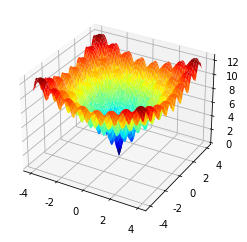

In [2]:
from matplotlib import pyplot as plt

r_min, r_max = -4.0, 4.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, .01)
yaxis = np.arange(r_min, r_max, .01)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)

# compute targets
# results = Ackley((x,y))
results = Ackley2D(x,y)
# create a surface plot with the jet color scheme
# results
figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()     

## 3. Run Genetic Algorithm from Scikit-Opt

In [3]:
from sko.GA import GA
# Lower bound
lb = [-30 for i in range(10)]
# Upper bound
ub = [30 for i in range(10)]


minYY = [[] for _ in range(50)]
for i in range(100):
        ga = GA(func=Ackley,
                n_dim=10,
                size_pop=50,
                max_iter=50,
                prob_mut=0.01,
                lb=lb, ub=ub,
                precision=1e-7)
        best_x, best_y = ga.run()
        for _ in range(50):
                minYY[_].append(np.min(ga.all_history_Y[_]))
        

print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [ 0.0759513  -1.22006131 -1.05747144 -0.968807   -0.95011407  1.00873492
  1.07406587  1.72164791 -0.11180361 -0.06213597] 
 best_y: [4.19366342]


## 4. Plot the result

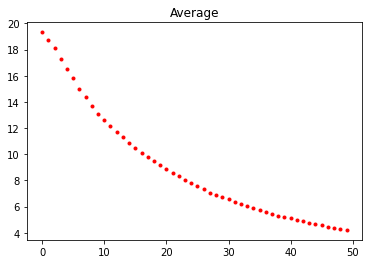

In [7]:

# Y_history = ga.all_history_Y

# avgY = [np.average(i) for i in Y_history]
minY = [np.average(i) for i in minYY]
idx = np.arange(50)
# fig, ax = plt.subplots(2, 1)
# plt.subplot(3,1,1)
plt.plot(idx, minY, '.', color='red')
plt.title("Average")
# plt.subplot(3,1,3)
# plt.plot(idx, minY, '.', color='red')
# plt.title("Minimum")

plt.show()

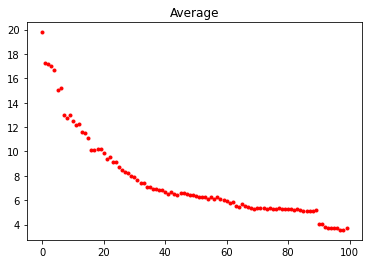

In [12]:
best_x, best_y = ga.run()
Y_history = ga.all_history_Y
idx = np.arange(100)
avgY = [np.min(i) for i in Y_history[:100]]
plt.plot(idx, avgY, '.', color='red')
plt.title("Average")
plt.show()